##  Maksat Final project

Our dataset is given for predicting house pricing. The dataset includes the date of purchase, house age, location, distance to nearest MRT station, and house price of unit area.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # graph visualization
from sklearn.model_selection import train_test_split
import scipy as sc
from sklearn.preprocessing import PolynomialFeatures
from scipy import optimize
from sklearn.linear_model import LinearRegression

### Step 1. Dataset - Real Estate Price

We have chosen this dataset. The goal of our project is to find the best price of houses.

### Step 2. Explanatory Data Analyses 

During our analysis, we have decided that there is no need in columns "No" and "Date", so we will drop them.

In [ ]:
data = pd.read_csv("Real_estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


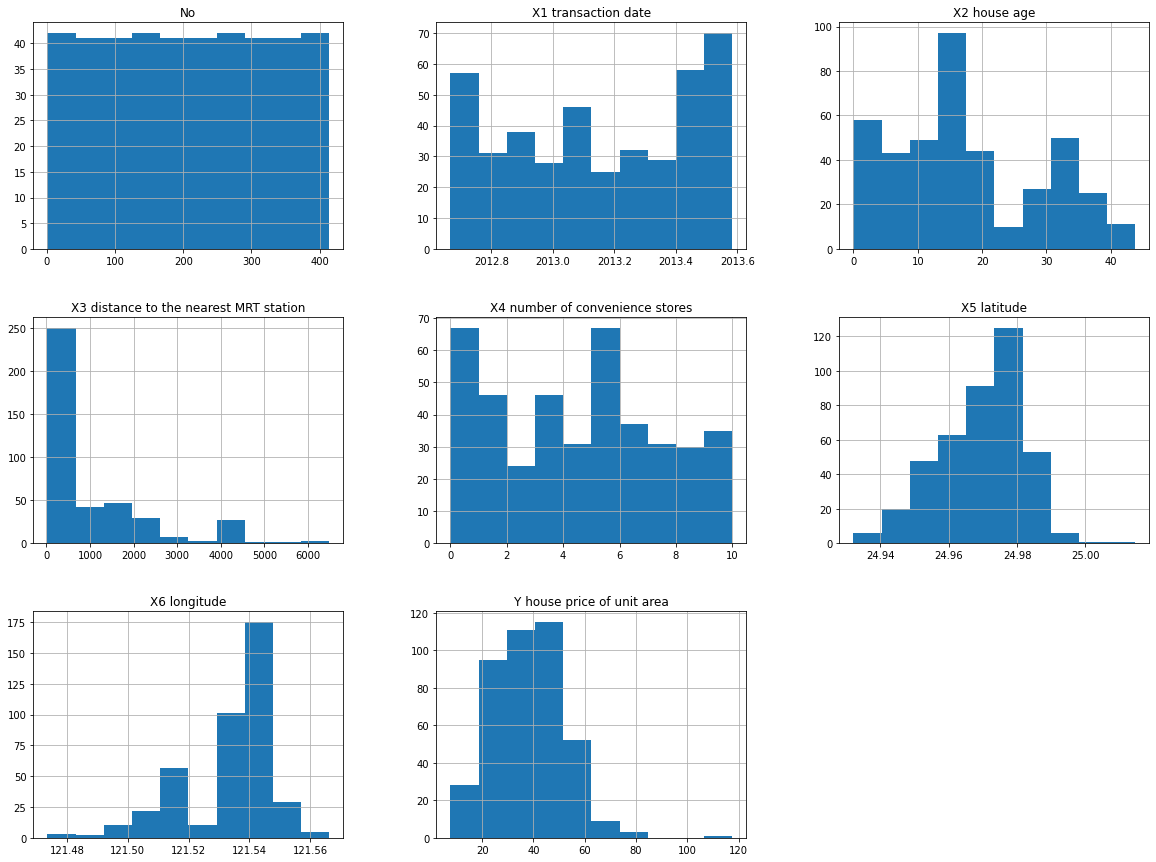

In [ ]:
data.hist(bins = 10 , figsize = (20,15))
plt.show()

In [ ]:
#There is no need of 'No' column and 'Date' column, because they do not affect on price, so drop it.
data.drop(['No'], axis=1, inplace=True)
data.drop(['X1 transaction date'],axis=1, inplace=True)

### Find and remove outliers from Dataset

In [ ]:
first_quartile = data.quantile(q=0.25)
third_quartile = data.quantile(q=0.75)
IQR = third_quartile - first_quartile
outliers = data[(data > (third_quartile + 1.5 * IQR)) | (data < (first_quartile - 1.5 * IQR))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)

# we remove outliers in the number of 100.
outliers = outliers.head(100)
data.drop(outliers.index, inplace=True)

In [ ]:
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243,28.1
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


Check each column for null values

In [ ]:
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Step 1. Preparing Dataset

Split dataset on X and y matrices

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

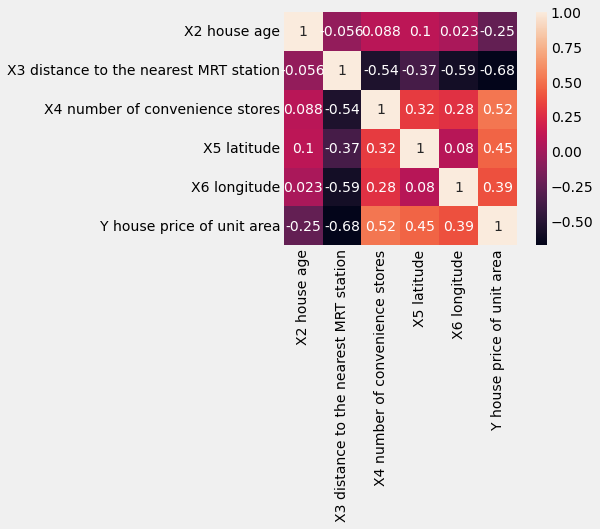

In [ ]:
# correlation in matrix format
# pandas.DataFrame.corr 
correlation = data.corr()
sns.heatmap(correlation, annot=True, linecolor='black', square=True)
plt.show()

Now, we plot the correlation. It accepts dataset that we read from file and shows correlation individually to analyze how each feature affects the price.


 Checking correlation: 


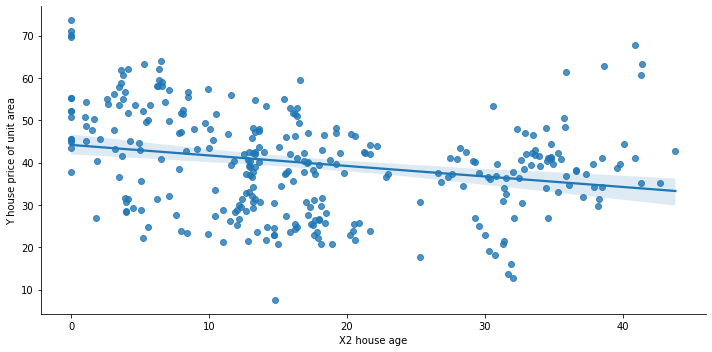

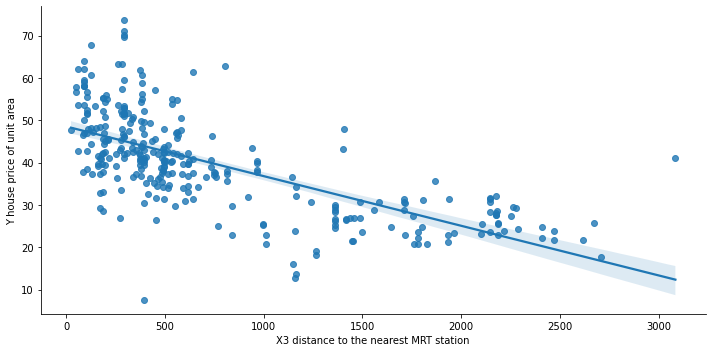

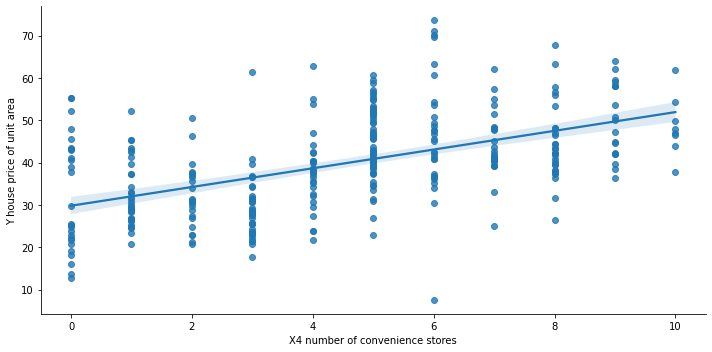

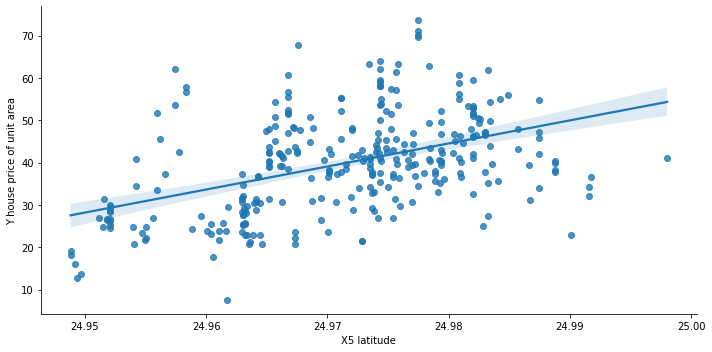

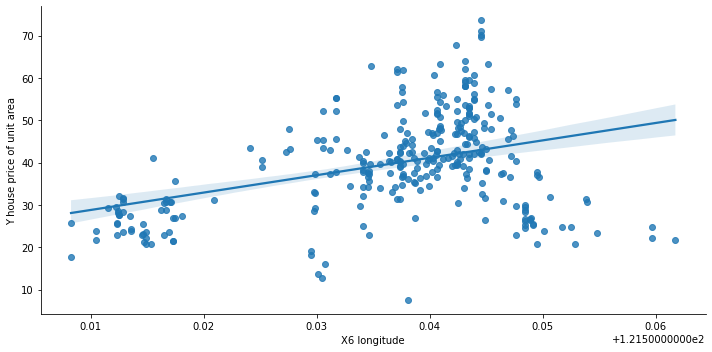

In [ ]:
def plotCorrelation(dataset):
    sns.lmplot(x='X2 house age',y='Y house price of unit area',data=dataset,aspect=2,height=5)
    sns.lmplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=dataset,aspect=2,height=5)
    sns.lmplot(x='X4 number of convenience stores',y='Y house price of unit area',data=dataset,aspect=2,height=5)
    sns.lmplot(x='X5 latitude',y='Y house price of unit area',data=dataset,aspect=2,height=5)
    sns.lmplot(x='X6 longitude',y='Y house price of unit area',data=dataset,aspect=2,height=5)

    #Check for correlation of features with one another: the highest correlation rate is 0.3, which is obviously low
    print('\n Checking correlation: ')

plotCorrelation(data)

In [ ]:
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243,28.1
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


### Implementing Cost Function and Gradient Descent w&amp;w/o Regularisation

We will use Linear regression to predict the price of houses. 

In [ ]:
def CostGrad(X, y, theta):
    m = y.size
    error = np.dot(X, theta) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error


def LinearGradReg(X, y, theta, alpha, epoch):
    cost_array = np.zeros(epoch)
    m = y.size
    for i in range(epoch):
        cost, error = CostGrad(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array


def plotChart(epoch, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(epoch), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

### Fitting linear regression

(219, 6)
(47, 6)
(48, 6)


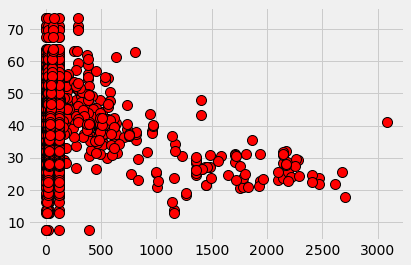

In [ ]:
# Split data set to train, cross validation, test 
import matplotlib.pyplot as pyplot
data_train,data_cval = train_test_split(data, train_size=0.7, test_size=0.30,random_state=100)
data_cval,data_test = train_test_split(data_cval, train_size=0.5, test_size=0.5, random_state=100)

print(data_train.shape)
print(data_cval.shape)
print(data_test.shape)

# y = np.array(data.pop('Y house price of unit area'))
# X = np.array(data)

pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1)

In [ ]:
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243,28.1
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


### Analysing Dataset. Dividing X and y for building a model

In [ ]:
y_train = np.array(data_train.pop('Y house price of unit area'))
X_train = np.array(data_train)

y_cval = np.array(data_cval.pop('Y house price of unit area'))
X_cval = np.array(data_cval)

y_test = np.array(data_test.pop('Y house price of unit area'))
X_test = np.array(data_test)

print("y_train.shape:", y_train.shape)
print("X_train.shape:", X_train.shape)
print("y_cval.shape:", y_cval.shape)
print("X_cval.shape:", X_cval.shape)
print("y_test.shape:", y_test.shape)
print("X_test.shape:", X_test.shape)

y_train.shape: (219,)
X_train.shape: (219, 5)
y_cval.shape: (47,)
X_cval.shape: (47, 5)
y_test.shape: (48,)
X_test.shape: (48, 5)


### Normalising datasets

In [ ]:
# pandas.DataFrame.std - Return sample standard deviation over requested axis.
X = (X - X.mean()) / X.std()
X_train = (X_train - X_train.mean()) / X_train.std()
X_cval = (X_cval - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

### Working on dataset. Analysing theta and Cost Function from initial dataset with linear regression

With initial theta values of [0. 0. 0. 0. 0. 0.], cost error is 862.2603343949042
THETA: [39.84490438 -3.70672152 -5.59481609  2.31209196  2.86405052  0.44349902]


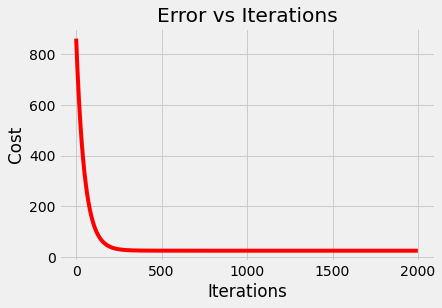

With final theta values of [39.84490438 -3.70672152 -5.59481609  2.31209196  2.86405052  0.44349902], cost error is 25.376385466427863


In [ ]:
# Add a 1 column to the start to allow vectorized gradient descent
X_ones = np.c_[np.ones(X.shape[0]), X] 

# Set hyperparameters
alpha = 0.01
epoch = 2000

# Initialize Theta Values to 0
theta = np.zeros(X_ones.shape[1])
initial_cost, _ = CostGrad(X_ones, y, theta)
print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

# Run Gradient Descent
theta, cost_num = LinearGradReg(X_ones, y, theta, alpha, epoch)
print("THETA:", theta)

# Display cost chart
plotChart(epoch, cost_num)

final_cost, _ = CostGrad(X_ones, y, theta)

print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

### Learning Curve

In [ ]:
m, n = X.shape
def linearRegressionCost(theta, X, y, lambda_=0.0):
    m = X.shape[0]
    h = X.dot(theta)
    
    cost = 1 / (2 * m) * (h - y).T.dot((h - y)) + lambda_ / (2 * m) * np.sum(theta[1:] * theta[1:])
    grad = 1 / m * X.T.dot(h - y)
    for i in range(1, len(grad)):
        temp = 1 / m * X.T.dot(h - y) + lambda_ / m * theta[i]
        grad[i] = temp[i]
    return cost, grad

In [ ]:
def learningCurve(X_val, y_val, X_train, y_train, initial_theta, lambda_=0.0):
    error_train = []
    error_val = []
    for i in range(1, m):
        optimized = optimize.minimize(linearRegressionCost, initial_theta, (X_train[:i, :], y_train[:i], lambda_), method='TNC', jac=True)
        theta = optimized.x
        cost_train = linearRegressionCost(theta, X_train[:i, :], y_train[:i], lambda_)[0]
        error_train.append(cost_train)
        cost_test = linearRegressionCost(theta, X_val, y_val, lambda_)[0]
        error_val.append(cost_test)
    return error_train, error_val

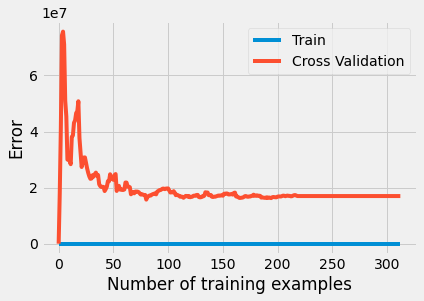

In [ ]:
X_train_ones = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test_ones = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
theta = np.zeros(n + 1)

error_train, error_val =  learningCurve(X_test_ones, y_test, X_train_ones, y_train, theta)
plt.plot(error_train)
plt.plot(error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

We see that our graph is "just-right" model. 

In [ ]:
#dropping columns
X = data.loc[:,'X2 house age' : 'X6 longitude']
y = data.loc[:,'Y house price of unit area']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)    #fit train set
price_predict = reg.predict(X_test)

#regression coefficients
index_reg = ['Intercept', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X4 number of convenience stores', 'X6 longitude']
pd.DataFrame(data=np.append(reg.intercept_, reg.coef_), index=index_reg, columns=['values']).transpose()

,Intercept,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X4 number of convenience stores,X6 longitude
values,-14768.554821,-0.358406,-0.008497,0.771561,304.081186,59.43981


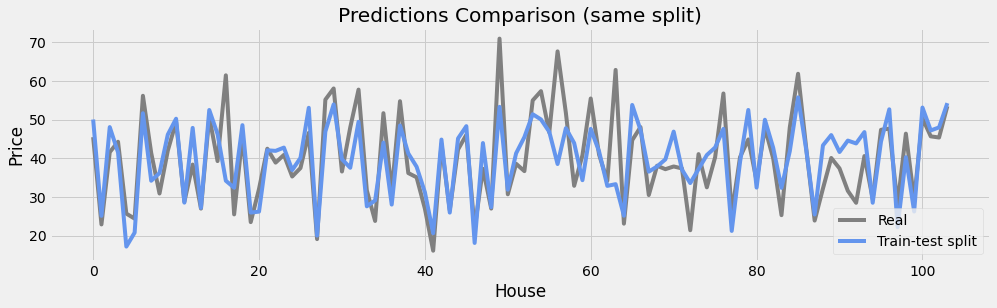

In [ ]:
#Predictions comparison plot
plt.figure(figsize=(15,4))

plt.plot(np.array(y_test), color='grey', label='Real')
plt.plot(price_predict, color='cornflowerblue', label='Train-test split')
plt.xlabel('House')
plt.ylabel('Price')
plt.title('Predictions Comparison (same split)')
plt.legend(loc=4)
plt.show()



Regression Evaluation Metrics: mean of the absolute value, mean of the squared, square root of the mean

In [ ]:
def mean_absolute_error(y, h):
    n = len(y)
    return 1 / n * np.sum(np.abs(y - h))

def mean_squared_error(y, h):
    n = len(y)
    return 1 / n * np.sum((y - h).T.dot(y - h))

In [ ]:
X_train_ones = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
theta = np.zeros(n + 1)
optimized = optimize.minimize(linearRegressionCost, theta, (X_train_ones, y_train), method='TNC', jac=True)
theta = optimized.x

h = X_train_ones.dot(theta)

MAE = mean_absolute_error(y_train, h)
MSE = mean_squared_error(y_train, h)
RMSE = np.sqrt(MSE)

print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)

MAE 5.152653486376866
MSE 53.29934489838712
RMSE 7.300640033475635


In [ ]:
X_test_ones = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
h_test = X_test_ones.dot(theta)

MAE_test = mean_absolute_error(y_test, h_test)
MSE_test = mean_squared_error(y_test, h_test)
RMSE_test = np.sqrt(MSE_test)

print('MAE-test', MAE_test)
print('MSE-test', MSE_test)
print('RMSE-test', RMSE_test)

MAE-test 5.476824719499067
MSE-test 60.63861975871325
RMSE-test 7.78708031027761


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train,pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test,pred_test))


print("RMSE for traning set is: ", RMSE_train)
print("RMSE for testing set is: ", RMSE_test)

RMSE for traning set is:  6.964729595470409
RMSE for testing set is:  7.499054637859346


In [ ]:
model = LinearRegression()

# sklearn
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# Trained Model 
X_train_ones = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
theta = np.zeros(X_train_ones.shape[1])
optimized = optimize.minimize(linearRegressionCost, theta, (X_train_ones, y_train), method='TNC', jac=True)
theta = optimized.x

h = X_train_ones.dot(theta)

# Normal Equation
from numpy.linalg import inv

theta_ne = np.dot(inv((np.dot(X_train_ones.T, X_train_ones))), (np.dot(X_train_ones.T, y_train)))
h_ne = X_train_ones.dot(theta_ne)

pd.DataFrame({'Train model':h, 'Sklearn model':y_pred})

,Train model,Sklearn model
0,34.346925,36.958901
1,38.401212,37.283636
2,31.647005,28.548600
3,52.546454,53.341410
4,54.201472,54.085383
...,...,...
205,30.173384,32.509673
206,43.672320,44.799134
207,45.510530,47.981868
208,26.970248,24.171170


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad5825d0-5038-4fe2-b2a8-30179b1f5667' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>